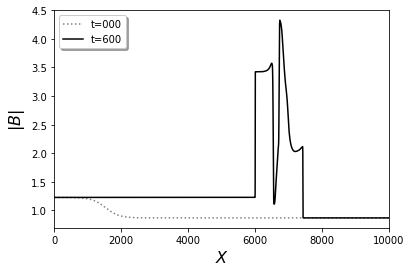

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
# dummy index
x=0;y=1;ro=2;pr=3;vx=4;vy=5;vz=6;bx=7;by=8;bz=9

# reading the data...
d1 = np.loadtxt('data/x-00000.dat')
d2 = np.loadtxt('data/x-00006.dat')

# Y axis (density)
#line1, = plt.plot(d1[:,x],d1[:,ro],linestyle=':',color='gray')
#line2, = plt.plot(d2[:,x],d2[:,ro],linestyle='-',color='black')
#plt.ylabel('Density', fontsize=16)
#plt.ylabel(r'$\rho$', fontsize=20)
# Y axis (|B|)
line1, = plt.plot(d1[:,x],np.sqrt(d1[:,bx]**2+d1[:,by]**2+d1[:,bz]**2),linestyle=':',color='gray')
line2, = plt.plot(d2[:,x],np.sqrt(d2[:,bx]**2+d2[:,by]**2+d2[:,bz]**2),linestyle='-',color='black')
plt.ylabel(r'$|B|$', fontsize=16)

# X axis
plt.xlim( 0, 10000)
plt.xlabel(r'$X$',fontsize=16)
plt.legend( (line1, line2), ('t=000', 't=600'), loc='upper left', shadow=True)
#plt.legend( (line1, line2), ('t=000', 't=600'), loc='best', shadow=True)

#plt.tight_layout() # if necessary
plt.show()
#plt.savefig("output.png")

In [2]:
# Interactive version by jupyter-notebook / ipywidgets
# To use it, please install jupyter and then activate widgetsnbextension.
# $ pip3 install jupyter
# $ [ pip3 install ipywidgets ]
# $ jupyter nbextension enable --py widgetsnbextension
# Then one can run this sample
# $ jupyter-notebook plot.ipynb

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import glob
from ipywidgets import interact

labels={"x":0,"y":1,"Density":2,"Pressure":3,"vx":4,"vy":5,"vz":6,"Bx":7,"By":8,"Bz":9}
colors=['r','g','b']
markers=['o','s','.']
linestyles=['--','-.','-']
datalist = sorted(glob.glob('data/x-?????.dat')) # filelist (regular expression)

@interact (inputdata=datalist,xlabel=labels,ylabel=labels,color=colors,marker=markers,linestyle=linestyles)
def plot(inputdata,xlabel=0,ylabel=8,color='b',marker='o',linestyle='-'):
    # reading the data...
    d1 = np.loadtxt('data/x-00000.dat')
    d2 = np.loadtxt(inputdata)
    print(inputdata)
    # plot
    line1, = plt.plot(d1[:,xlabel],d1[:,ylabel],linestyle=':',color='gray')
    line2, = plt.plot(d2[:,xlabel],d2[:,ylabel],color=color,marker=marker,linestyle=linestyle)
    labelnames = list(labels.keys())
    plt.xlabel(labelnames[xlabel])
    plt.ylabel(labelnames[ylabel])
    plt.legend( (line1, line2), ('t=000', 't=' + inputdata[-5] + '00'), loc='upper left', shadow=True)
    #plt.savefig("output.png")

interactive(children=(Dropdown(description='inputdata', options=('data/x-00000.dat', 'data/x-00001.dat', 'data…